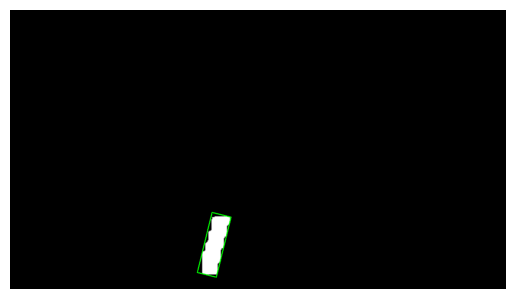

'1_test_with_box.png'

In [3]:
'''import cv2
import numpy as np
import matplotlib.pyplot as plt

# This function will calculate the bounding box and draw it on the image
def calculate_and_draw_bounding_box(image_path):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, 0)

    # Threshold the image to ensure it's binary
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there is only one contour, which is the white region
    cnt = contours[0]

    # Find the rotated rectangle that bounds the white region
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the bounding box on the original image
    image_with_box = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image_with_box, [box], 0, (0, 255, 0), 2)

    # The dimensions of the bounding box
    width, height = rect[1]

    # The orientation of the bounding box
    angle = rect[2]

    # Normalize the angle to ensure the width is always the longer side
    if width < height:
        width, height = height, width
        angle = 90 + angle

    # Save the image with the bounding box
    output_path = image_path.replace('.png', '_with_box.png')
    cv2.imwrite(output_path, image_with_box)

    # Return the bounding box details and the path to the saved image with the bounding box
    return (width, height, angle, output_path)

# Calculate the bounding box, draw it on the image, and save the output
bounding_box_details = calculate_and_draw_bounding_box('1_test.png')

# Display the image with the bounding box
image_with_box_path = bounding_box_details[3]
image_with_box = cv2.imread(image_with_box_path)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axes
plt.show()

# Output the path to the saved image with the bounding box
image_with_box_path
'''

(159.72450256347656,
 50.89612579345703,
 103.82864952087402,
 '1_test_with_box.png')

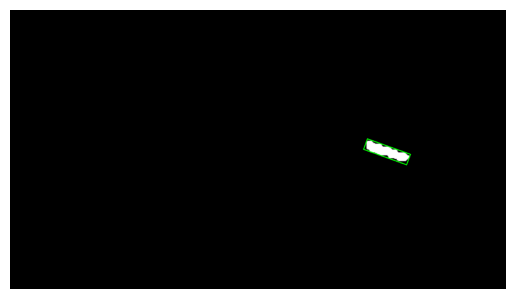

Center coordinates of the bounding box: (973.04736328125, 366.2445068359375)
Width: 117.65, Height: 28.96, Angle: 19.98


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# This function will calculate the bounding box and draw it on the image
def calculate_and_draw_bounding_box(image_path):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, 0)

    # Threshold the image to ensure it's binary
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there is only one contour, which is the white region
    cnt = contours[0]

    # Find the rotated rectangle that bounds the white region
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the bounding box on the original image
    image_with_box = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image_with_box, [box], 0, (0, 255, 0), 2)

    # The dimensions of the bounding box
    width, height = rect[1]

    # The orientation of the bounding box
    angle = rect[2]

    # Normalize the angle to ensure the width is always the longer side
    if width < height:
        width, height = height, width
        angle = 90 + angle

    # The center of the bounding box
    center = rect[0]

    # Save the image with the bounding box
    output_path = image_path.replace('.png', '_with_box.png')
    cv2.imwrite(output_path, image_with_box)

    # Return the bounding box details and the path to the saved image with the bounding box
    return (width, height, angle, center, output_path)

# Calculate the bounding box, draw it on the image, and save the output
bounding_box_details = calculate_and_draw_bounding_box('mask2.png')

# Display the image with the bounding box
image_with_box_path = bounding_box_details[4]
image_with_box = cv2.imread(image_with_box_path)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axes
plt.show()

# Print the center coordinates of the bounding box
center_coordinates = bounding_box_details[3]
print(f"Center coordinates of the bounding box: {center_coordinates}")

# Print the width, height, and angle of the bounding box
print(f"Width: {bounding_box_details[0]:.2f}, Height: {bounding_box_details[1]:.2f}, Angle: {bounding_box_details[2]:.2f}")


In [18]:
bounding_box_details[3]

(526.9161987304688, 605.8716430664062)

In [14]:
image = cv2.imread("1_test.png", 0)
print(image.shape)

(720, 1280)


In [15]:
'''import cv2
import numpy as np

def place_logo_on_transparent_image(logo_path, length, breadth, angle, center):
    # Create a transparent image (720x1280) with 4 channels (RGBA)
    transparent_image = np.zeros((image.shape[1], image.shape[0], 4), dtype=np.uint8)
    
    # Load the logo image
    logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)
    if logo.shape[2] < 4:
        # Add an alpha channel if the logo does not have one
        logo = cv2.cvtColor(logo, cv2.COLOR_BGR2BGRA)
    
    # Calculate the size of the logo after resizing
    scale_factor_width = length / logo.shape[1]
    scale_factor_height = breadth / logo.shape[0]
    logo_resized = cv2.resize(logo, None, fx=scale_factor_width, fy=scale_factor_height, interpolation=cv2.INTER_AREA)
    
    # Rotate the logo
    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D((logo_resized.shape[1] / 2, logo_resized.shape[0] / 2), angle, 1)
    # Calculate the bounding box of the new image after rotation
    abs_cos = abs(M[0, 0])
    abs_sin = abs(M[0, 1])
    bound_w = int(logo_resized.shape[0] * abs_sin + logo_resized.shape[1] * abs_cos)
    bound_h = int(logo_resized.shape[0] * abs_cos + logo_resized.shape[1] * abs_sin)
    # Adjust the rotation matrix to the center of the bounding box
    M[0, 2] += bound_w / 2 - logo_resized.shape[1] / 2
    M[1, 2] += bound_h / 2 - logo_resized.shape[0] / 2
    # Rotate the logo with the new bounds
    logo_rotated = cv2.warpAffine(logo_resized, M, (bound_w, bound_h), borderMode=cv2.BORDER_TRANSPARENT)
    
    # Convert rotated logo to 4 channels if necessary
    if logo_rotated.shape[2] < 4:
        logo_rotated = cv2.cvtColor(logo_rotated, cv2.COLOR_BGR2BGRA)
    
    # Place the logo on the transparent image
    # Calculate the top-left corner from the center point
    start_x = int(center[0] - bound_w / 2)
    start_y = int(center[1] - bound_h / 2)
    end_x = start_x + logo_rotated.shape[1]
    end_y = start_y + logo_rotated.shape[0]
    
    # Ensure the logo is within bounds
    if start_x < 0 or start_y < 0 or end_x > transparent_image.shape[1] or end_y > transparent_image.shape[0]:
        raise ValueError("The logo placement is out of bounds.")
    
    # Place the logo
    for i in range(logo_rotated.shape[0]):
        for j in range(logo_rotated.shape[1]):
            if logo_rotated[i, j][3] > 0:  # Only non-transparent pixels
                transparent_image[start_y + i, start_x + j] = logo_rotated[i, j]
    
    # Save the result
    output_path = 'output_transparent_image_with_logo.png'
    cv2.imwrite(output_path, transparent_image)
    print(f"Image saved to {output_path}")



'''

In [7]:
180 - bounding_box_details[2]

24.646766662597656

In [28]:
import cv2
import numpy as np

def place_logo_on_transparent_image(logo_path, length, breadth, angle, center):
    transparent_image = np.zeros((720, 1280, 4), dtype=np.uint8)
    
    # Load the logo image with transparency if available
    logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)
    
    # Check if the image was loaded successfully
    if logo is None:
        raise FileNotFoundError(f"No image found at path: {logo_path}")
    
    # If the logo does not have an alpha channel, add one
    if len(logo.shape) == 2:  # Grayscale image
        logo = cv2.cvtColor(logo, cv2.COLOR_GRAY2BGRA)
    elif logo.shape[2] == 3:  # Color image without alpha channel
        logo = cv2.cvtColor(logo, cv2.COLOR_BGR2BGRA)
    
    # Ensure length and breadth are integers
    length, breadth = int(length), int(breadth)

    # Resize the logo to fit the desired dimensions
    logo_resized = cv2.resize(logo, (length, breadth), interpolation=cv2.INTER_AREA)
    
    # Calculate the rotation matrix considering the center of the logo
    M = cv2.getRotationMatrix2D((length / 2, breadth / 2), angle, 1)
    # Determine the size of the new image required to avoid clipping
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_width = int((breadth * sin) + (length * cos))
    new_height = int((breadth * cos) + (length * sin))
    # Adjust the rotation matrix to consider translation
    M[0, 2] += (new_width / 2) - (length / 2)
    M[1, 2] += (new_height / 2) - (breadth / 2)
    # Rotate the logo without clipping
    logo_rotated = cv2.warpAffine(logo_resized, M, (new_width, new_height), borderMode=cv2.BORDER_TRANSPARENT)
    
    # Convert rotated logo back to BGRA if it lost the alpha channel during rotation
    if logo_rotated.shape[-1] != 4:
        logo_rotated = cv2.cvtColor(logo_rotated, cv2.COLOR_BGR2BGRA)
    
    # Calculate the position to place the logo
    start_x = int(center[0] - new_width / 2)
    start_y = int(center[1] - new_height / 2)
    
    # Ensure the starting points are within the transparent image bounds
    start_x = max(0, start_x)
    start_y = max(0, start_y)
    
    # Place the logo on the transparent image
    for y in range(logo_rotated.shape[0]):
        for x in range(logo_rotated.shape[1]):
            if logo_rotated[y, x][3] > 0:  # Check for alpha channel value
                transparent_image[start_y + y, start_x + x] = logo_rotated[y, x]

    # Save the result
    output_path = 'output10.png'
    cv2.imwrite(output_path, transparent_image)
    return output_path

In [29]:
place_logo_on_transparent_image('nokia.png', bounding_box_details[0], bounding_box_details[1], 180 - bounding_box_details[2], (bounding_box_details[3][0], bounding_box_details[3][1]))

'output10.png'

In [27]:
import cv2
import numpy as np

def delete_outside_bounding_box(image_path, bbox_details):
    # Load the image with alpha channel
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Bounding box details: width, height, angle (counterclockwise from +x axis), and center (x, y)
    width, height, angle, center = bbox_details
    
    # Convert width, height, angle, and center into integers
    width, height = int(width), int(height)
    center = (int(center[0]), int(center[1]))
    
    # Create a blank mask with the same dimensions as the image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    # Calculate the bounding box points (assuming rectangle for simplicity)
    rect = ((center[0], center[1]), (width, height), angle)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Draw the rectangle on the mask with white color
    cv2.drawContours(mask, [box], 0, (255), -1)
    
    # Create a new image to store the result
    result = np.zeros_like(image)
    
    # Apply the mask to retain only the part inside the bounding box
    for i in range(4):  # Loop through B, G, R, and Alpha channels
        result[:,:,i] = cv2.bitwise_and(image[:,:,i], image[:,:,i], mask=mask)
    
    # Save the result
    output_path = image_path.replace('.png', '_inside_bbox.png')
    cv2.imwrite(output_path, result)
    
    return output_path

# Bounding box details obtained from the first part
bounding_box_details = ( bounding_box_details[0], bounding_box_details[1], bounding_box_details[2], (bounding_box_details[3][0], bounding_box_details[3][1]))  # Replace with actual values

# Your alpha image path
image_path = 'output9.png'  # Specify your alpha image path

# Delete everything outside the bounding box
output_path = delete_outside_bounding_box(image_path, bounding_box_details)

print(f"Image saved to {output_path}")


Image saved to output9_inside_bbox.png


NameError: name 'logo' is not defined

In [8]:
'''# Define the function to resize, rotate, and place the logo on a transparent background
def fit_logo_to_bounding_box(logo_path, bounding_box):
    # Unpack bounding box details
    (x_center, y_center), (width, height), angle = bounding_box
    
    # Load the logo image with transparency
    logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)
    
    # Resize logo to fit the bounding box dimensions
    logo_resized = cv2.resize(logo, (int(width), int(height)))
    
    # Since OpenCV defines the angle in the clockwise direction, we convert it to anti-clockwise.
    angle = -angle
    
    # Calculate the rotation matrix for the logo
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Determine the size of the new image required to avoid clipping
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    # Adjust the rotation matrix to consider translation
    M[0, 2] += (new_width / 2) - (width / 2)
    M[1, 2] += (new_height / 2) - (height / 2)
    # Rotate the logo without clipping
    logo_rotated = cv2.warpAffine(logo_resized, M, (new_width, new_height))
    
    # Create a new transparent image
    transparent_image = np.zeros((1280, 720, 4), dtype=np.uint8)
    
    # Calculate the top-left corner for the logo
    start_x = int(x_center - new_width / 2)
    start_y = int(y_center - new_height / 2)
    
    # Overlay the rotated logo onto the transparent image
    for i in range(logo_rotated.shape[0]):
        for j in range(logo_rotated.shape[1]):
            # Check if the pixel is not fully transparent
            if logo_rotated[i, j][3] > 0:
                transparent_image[start_y + i, start_x + j] = logo_rotated[i, j]
    
    return transparent_image

# Provide the path to your logo image
logo_image_path = 'logo.jpg'  # Replace with your logo image path if different

# Fit the logo to the bounding box and get the result
fitted_logo_image = fit_logo_to_bounding_box(logo_image_path, bounding_box)

# Save the resulting image
output_fitted_logo_path = 'fitted_logo.png'
cv2.imwrite(output_fitted_logo_path, fitted_logo_image)

# Display the resulting image
plt.imshow(cv2.cvtColor(fitted_logo_image, cv2.COLOR_BGRA2RGBA))
plt.axis('off')  # Hide the axes
plt.show()

# Return the path to the saved image
output_fitted_logo_path


NameError: name 'bounding_box' is not defined

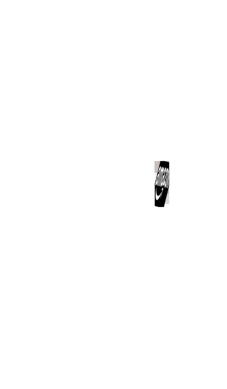

'fitted_logo_corrected.png'

In [11]:
'''# Since the execution environment has been reset, we need to redefine the bounding box details from the previous output.
# These values are taken from the output of the calculate_bounding_box function.
bounding_box_details = ((526.9161987304688, 605.8716430664062),
                        (50.89612579345703, 159.72450256347656),
                        13.828649520874023)

# Redefine the function with improved error handling for image loading
def fit_logo_to_bounding_box(logo_path, bounding_box):
    # Unpack bounding box details
    (x_center, y_center), (width, height), angle = bounding_box
    
    # Load the logo image with transparency if available
    logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)
    if logo is None:
        raise FileNotFoundError("The logo image file was not found.")
    
    # Check if the image has an alpha channel; if not, add one
    if len(logo.shape) == 2 or logo.shape[2] == 3:
        # Convert to BGRA (with alpha channel)
        logo = cv2.cvtColor(logo, cv2.COLOR_BGR2BGRA)
    
    # Resize logo to fit the bounding box dimensions
    logo_resized = cv2.resize(logo, (int(width), int(height)), interpolation=cv2.INTER_AREA)
    
    # Adjust the angle to match the image orientation
    angle = -angle  # OpenCV's angle is in the clockwise direction
    
    # Calculate the rotation matrix for the logo
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Rotate the logo without clipping
    logo_rotated = cv2.warpAffine(logo_resized, M, (int(width), int(height)), borderMode=cv2.BORDER_TRANSPARENT)
    
    # Create a new transparent image
    transparent_image = np.zeros((1280, 720, 4), dtype=np.uint8)
    
    # Calculate the top-left corner for the logo
    start_x = int(x_center - width / 2)
    start_y = int(y_center - height / 2)
    
    # Overlay the rotated logo onto the transparent image
    for i in range(int(height)):
        for j in range(int(width)):
            # Only overlay pixels that are not completely transparent
            if logo_rotated[i, j][3] != 0:
                transparent_image[start_y + i, start_x + j] = logo_rotated[i, j]
    
    return transparent_image

# Path to the logo image (second uploaded image)
logo_image_path = 'logo.jpg' 

# Fit the logo to the bounding box and get the result
fitted_logo_image = fit_logo_to_bounding_box(logo_image_path, bounding_box_details)

# Save the resulting image
output_fitted_logo_path = 'fitted_logo_corrected.png'
cv2.imwrite(output_fitted_logo_path, fitted_logo_image)

# Display the resulting image
plt.imshow(cv2.cvtColor(fitted_logo_image, cv2.COLOR_BGRA2RGBA))
plt.axis('off')  # Hide the axes
plt.show()

# Return the path to the saved image
output_fitted_logo_path


In [ ]:
import cv2
from PIL import Image
import numpy as np

# Open the video file
video_path = 'both.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec based on your needs
out = cv2.VideoWriter('th.mp4', fourcc, fps, (width, height))

# Load the transparent image
transparent_image_path = 'output10.png'
transparent_image = Image.open(transparent_image_path).convert('RGBA')

# Iterate through each frame in the video
while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    # Convert the frame to RGBA
    frame_rgba = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    base_image = Image.fromarray(frame_rgba)

    # Resize the transparent image to match the frame size
    transparent_image_resized = transparent_image.resize((width, height))

    # Paste the transparent image onto the frame
    result_image = Image.alpha_composite(base_image, transparent_image_resized)

    # Convert the result back to BGR for writing to the output video
    result_frame_bgr = cv2.cvtColor(np.array(result_image), cv2.COLOR_RGBA2BGR)

    # Write the frame to the output video
    out.write(result_frame_bgr)

# Release the video capture and writer objects
cap.release()
out.release()


